In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
#Fetch Images count from Fodlers
count = 0 
dirs = os.listdir('dataset/')
for dir in dirs:
    files = list(os.listdir('dataset/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

chili_anthacnose Folder has 570 Images
chili_healthy Folder has 693 Images
chili_leaf_curl Folder has 643 Images
chili_leaf_spot Folder has 664 Images
chili_whitefly Folder has 507 Images
chili_yellowish Folder has 566 Images
Images Folder has 3643 Images


In [3]:
#Load Images into Arrays as Dataset
base_dir = 'dataset/'
img_size = 640
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3643 files belonging to 6 classes.
Using 2915 files for training.
Found 3643 files belonging to 6 classes.
Using 728 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['chili_anthacnose',
 'chili_healthy',
 'chili_leaf_curl',
 'chili_leaf_spot',
 'chili_whitefly',
 'chili_yellowish']

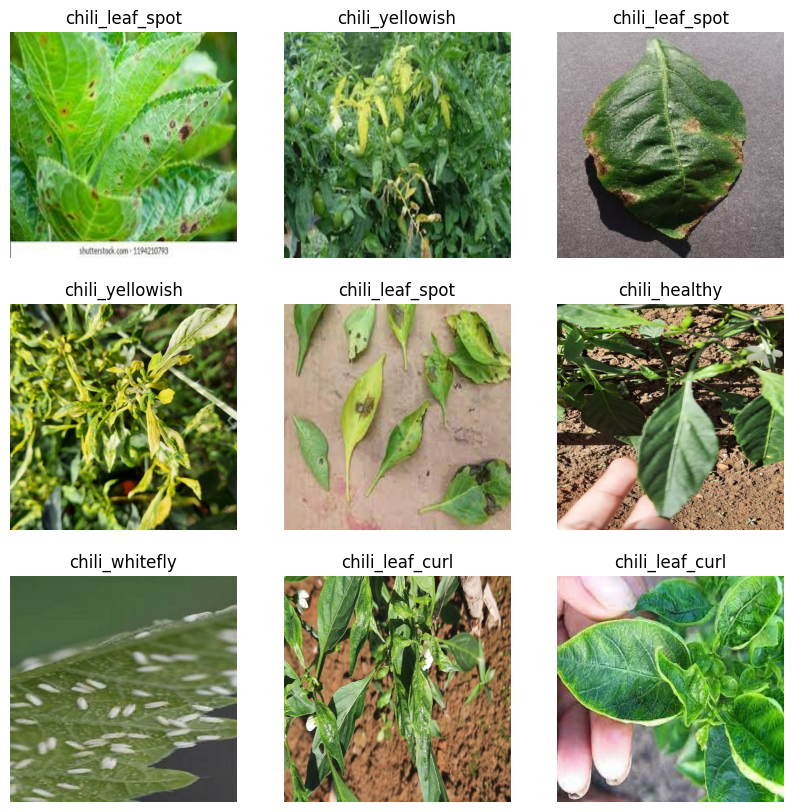

In [6]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [9]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [11]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

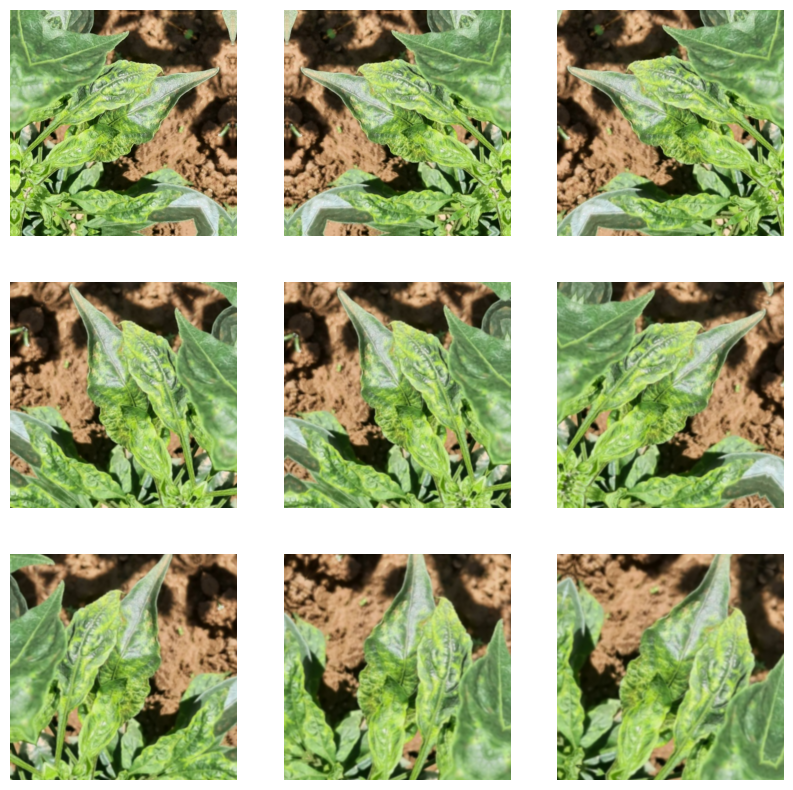

In [19]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [20]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 640, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 640, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 640, 640, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 320, 320, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 320, 320, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 160, 160, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 160, 160, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 80, 80, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 40, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 40, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      13,107,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,168,614 (50.23 MB)

 Trainable params: 13,168,614 (50.23 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    train_ds, 
    epochs=50, 
    validation_data=val_ds
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.2052 - loss: 1.8946 - val_accuracy: 0.4052 - val_loss: 1.4489
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.4871 - loss: 1.3164 - val_accuracy: 0.5907 - val_loss: 1.0800
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.5786 - loss: 1.1059 - val_accuracy: 0.5852 - val_loss: 1.0385
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.6231 - loss: 0.9848 - val_accuracy: 0.6593 - val_loss: 0.8856
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6607 - loss: 0.9013 - val_accuracy: 0.6511 - val_loss: 0.9287
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6910 - loss: 0.8163 - val_accuracy: 0.6291 - val_loss: 0.9469
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7038 - loss: 0.7615 - val_accuracy: 0.7129 - val_loss: 0.7797
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7309 - loss: 0.7298 - val_accuracy: 0.7308 - v

In [24]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 92}

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

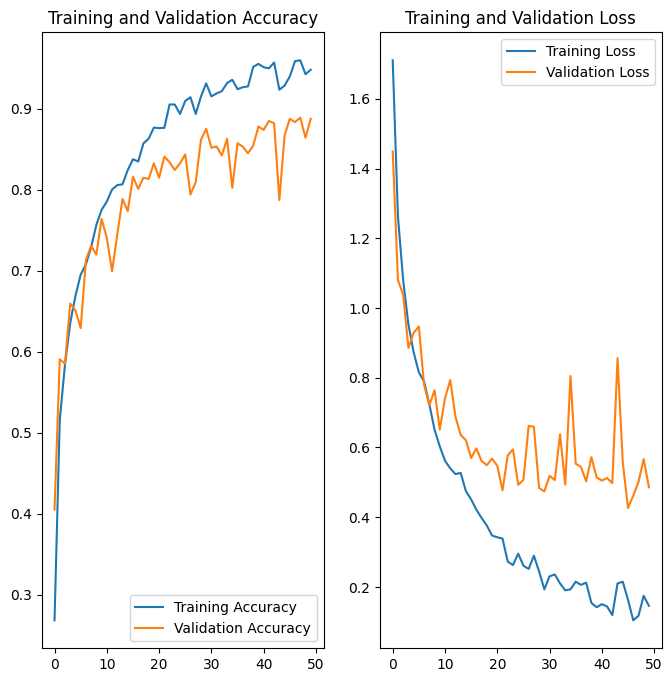

In [30]:
epochs=50

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [31]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(640,640))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The predicted class is ' + class_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [32]:
classify_images('img3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


'The predicted class is chili_leaf_spot with a score of 99.89011287689209'

In [33]:
classify_images('img4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


'The predicted class is chili_healthy with a score of 99.36248064041138'

In [34]:
classify_images('img8.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


'The predicted class is chili_healthy with a score of 99.9998927116394'

In [35]:
classify_images('img7.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'The predicted class is chili_leaf_curl with a score of 81.66974186897278'

In [36]:
classify_images('img6.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


'The predicted class is chili_leaf_curl with a score of 99.9974012374878'

In [37]:
classify_images('img5.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


'The predicted class is chili_anthacnose with a score of 99.99381303787231'

In [38]:
classify_images('img1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


'The predicted class is chili_whitefly with a score of 86.5332543849945'

In [39]:
model.save('Chili_Diseases_Classify_Model_v2.keras')